In [1]:
%load_ext autoreload
%autoreload 2

In [73]:
from ccd import CCD, cartesian_product
import matplotlib.pyplot as plt
%matplotlib inline

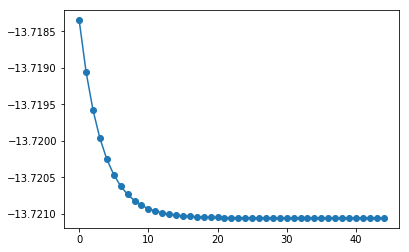

In [6]:
ccd = CCD(Z=4)
E, _ = ccd.solve()
plt.plot(E, '-o')
plt.show()


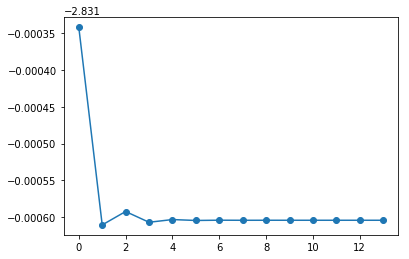

In [95]:
ccd = CCD(Z=2)
ccd.transform_to_hfock()
E, _ = ccd.solve(maxiter=100)
plt.plot(E, '-o')
plt.show()

All terms:  -0.005058214270918885
V and L:    -0.0051934965065775635
Only V:     -0.0014278940902259037


<BarContainer object of 3 artists>

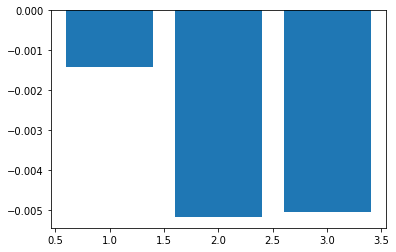

In [96]:
Z = 4
ccdLQ = CCD(Z)
ccdL = CCD(Z)
ccd = CCD(Z)
[x.transform_to_hfock for x in [ccdLQ, ccdL, ccd]]
ccdL.include_Q = False
ccd.include_Q = False
ccd.include_L = False
EcorrLQ = ccdLQ.solve()[1][-1]
EcorrL = ccdL.solve()[1][-1]
Ecorr = ccd.solve()[1][-1]
print("All terms: ", EcorrLQ)
print("V and L:   ", EcorrL)
print("Only V:    ", Ecorr)
plt.bar([1, 2, 3], [Ecorr, EcorrL, EcorrLQ])

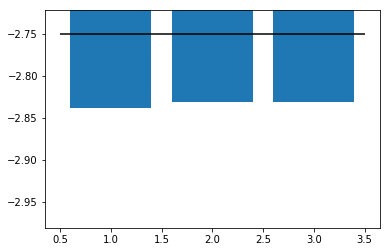

In [103]:
from fci import FCI
from hfock import solve_hfock

Z=2
fci_sys = FCI(Z)
ccd_sys = CCD(Z)
ccd_sys.transform_to_hfock()
E_hfock, sys_hfock, _ = solve_hfock(fci_sys, verbose=False)

E_fci = fci_sys.energy_states()[0][0]
E_ccd = ccd_sys.solve()[0][0]
E_hfock =E_hfock[-1]

plt.bar([1, 2, 3], [E_fci, E_hfock, E_ccd])
plt.ylim(top=fci_sys.Eref*.99)
plt.hlines(fci_sys.Eref, xmin=0.5, xmax=3.5)
plt.show()

In [9]:
f = ccd.h
v = ccd.v
print(ccd.energy())
t = ccd.initial_guess()
print(f.shape, v.shape, t.shape)
print(t.sum())

-2.7515083235073514
(6, 6) (6, 6, 6, 6) (2, 2, 4, 4)
0.0


In [10]:
a = ccd.initial_guess()
a[:, :, :, slice(2,5)].shape

(2, 2, 4, 2)

In [11]:
import numpy as np
a = np.arange(5*5).reshape((5,5))
print(a)
b = 2*np.ones((5,5))
c = np.zeros((5,5))
l = [1,3,4]
c[l,2:4] = a[l,2:4]/b[l,2:4]
print(c)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[[ 0.   0.   0.   0.   0. ]
 [ 0.   0.   3.5  4.   0. ]
 [ 0.   0.   0.   0.   0. ]
 [ 0.   0.   8.5  9.   0. ]
 [ 0.   0.  11.  11.5  0. ]]


In [12]:
from itertools import product
n = ccd.n
for k, l, m, n in cartesian_product(n, n, n, n):
    print(f"{k}, {l}, {m}, {n} = ", ccd.v[k, l, m, n], " ? ", (k, l, m, n) in ccd.double_excitations())

0, 0, 0, 0 =  0.0  ?  False
0, 0, 0, 1 =  0.0  ?  False
0, 0, 0, 2 =  0.0  ?  False
0, 0, 0, 3 =  0.0  ?  False
0, 0, 0, 4 =  0.0  ?  False
0, 0, 0, 5 =  0.0  ?  False
0, 0, 1, 0 =  0.0  ?  False
0, 0, 1, 1 =  0.0  ?  False
0, 0, 1, 2 =  0.0  ?  False
0, 0, 1, 3 =  0.0  ?  False
0, 0, 1, 4 =  0.0  ?  False
0, 0, 1, 5 =  0.0  ?  False
0, 0, 2, 0 =  0.0  ?  False
0, 0, 2, 1 =  0.0  ?  False
0, 0, 2, 2 =  0.0  ?  True
0, 0, 2, 3 =  0.0  ?  False
0, 0, 2, 4 =  0.0  ?  True
0, 0, 2, 5 =  0.0  ?  False
0, 0, 3, 0 =  0.0  ?  False
0, 0, 3, 1 =  0.0  ?  False
0, 0, 3, 2 =  0.0  ?  False
0, 0, 3, 3 =  0.0  ?  False
0, 0, 3, 4 =  0.0  ?  False
0, 0, 3, 5 =  0.0  ?  False
0, 0, 4, 0 =  0.0  ?  False
0, 0, 4, 1 =  0.0  ?  False
0, 0, 4, 2 =  0.0  ?  True
0, 0, 4, 3 =  0.0  ?  False
0, 0, 4, 4 =  0.0  ?  True
0, 0, 4, 5 =  0.0  ?  False
0, 0, 5, 0 =  0.0  ?  False
0, 0, 5, 1 =  0.0  ?  False
0, 0, 5, 2 =  0.0  ?  False
0, 0, 5, 3 =  0.0  ?  False
0, 0, 5, 4 =  0.0  ?  False
0, 0, 5, 5 =  0.0  ?  Fa

1, 3, 4, 0 =  0.0  ?  False
1, 3, 4, 1 =  0.0  ?  False
1, 3, 4, 2 =  0.0  ?  False
1, 3, 4, 3 =  0.0  ?  False
1, 3, 4, 4 =  0.0  ?  False
1, 3, 4, 5 =  0.0  ?  False
1, 3, 5, 0 =  0.0  ?  False
1, 3, 5, 1 =  -0.07860711682899044  ?  False
1, 3, 5, 2 =  0.0  ?  False
1, 3, 5, 3 =  -0.0012137918995343139  ?  False
1, 3, 5, 4 =  0.0  ?  False
1, 3, 5, 5 =  0.0  ?  False
1, 4, 0, 0 =  0.0  ?  False
1, 4, 0, 1 =  -0.08791889899219621  ?  False
1, 4, 0, 2 =  0.0  ?  False
1, 4, 0, 3 =  -0.022445836996582154  ?  False
1, 4, 0, 4 =  0.0  ?  False
1, 4, 0, 5 =  -0.01153564453125  ?  False
1, 4, 1, 0 =  0.08791889899219621  ?  False
1, 4, 1, 1 =  0.0  ?  False
1, 4, 1, 2 =  0.10105295382557258  ?  False
1, 4, 1, 3 =  0.0  ?  False
1, 4, 1, 4 =  0.198974609375  ?  False
1, 4, 1, 5 =  0.0  ?  False
1, 4, 2, 0 =  0.0  ?  False
1, 4, 2, 1 =  -0.10105295382557258  ?  False
1, 4, 2, 2 =  0.0  ?  False
1, 4, 2, 3 =  -0.009085693750900134  ?  False
1, 4, 2, 4 =  0.0  ?  False
1, 4, 2, 5 =  -0.00421807

3, 2, 0, 3 =  -0.017163314819200585  ?  False
3, 2, 0, 4 =  0.0  ?  False
3, 2, 0, 5 =  -0.009085693750900134  ?  False
3, 2, 1, 0 =  0.0438957475994513  ?  False
3, 2, 1, 1 =  0.0  ?  False
3, 2, 1, 2 =  0.017163314819200585  ?  False
3, 2, 1, 3 =  0.0  ?  False
3, 2, 1, 4 =  0.009085693750900134  ?  False
3, 2, 1, 5 =  0.0  ?  False
3, 2, 2, 0 =  0.0  ?  False
3, 2, 2, 1 =  -0.017163314819200585  ?  False
3, 2, 2, 2 =  0.0  ?  False
3, 2, 2, 3 =  -0.30078125  ?  False
3, 2, 2, 4 =  0.0  ?  False
3, 2, 2, 5 =  -0.04293411282225439  ?  False
3, 2, 3, 0 =  0.017163314819200585  ?  False
3, 2, 3, 1 =  0.0  ?  False
3, 2, 3, 2 =  0.30078125  ?  False
3, 2, 3, 3 =  0.0  ?  False
3, 2, 3, 4 =  0.04293411282225439  ?  False
3, 2, 3, 5 =  0.0  ?  False
3, 2, 4, 0 =  0.0  ?  False
3, 2, 4, 1 =  -0.009085693750900134  ?  False
3, 2, 4, 2 =  0.0  ?  False
3, 2, 4, 3 =  -0.04293411282225439  ?  False
3, 2, 4, 4 =  0.0  ?  False
3, 2, 4, 5 =  -0.0149520384  ?  False
3, 2, 5, 0 =  0.009085693750900

5, 0, 2, 5 =  -0.004857706356854169  ?  False
5, 0, 3, 0 =  0.10105295382557258  ?  False
5, 0, 3, 1 =  0.0  ?  False
5, 0, 3, 2 =  0.009085693750900134  ?  False
5, 0, 3, 3 =  0.0  ?  False
5, 0, 3, 4 =  0.004218077669259728  ?  False
5, 0, 3, 5 =  0.0  ?  False
5, 0, 4, 0 =  0.0  ?  False
5, 0, 4, 1 =  -0.01153564453125  ?  False
5, 0, 4, 2 =  0.0  ?  False
5, 0, 4, 3 =  -0.004218077669259728  ?  False
5, 0, 4, 4 =  0.0  ?  False
5, 0, 4, 5 =  -0.0022622638577071527  ?  False
5, 0, 5, 0 =  0.198974609375  ?  False
5, 0, 5, 1 =  0.0  ?  False
5, 0, 5, 2 =  0.004857706356854169  ?  False
5, 0, 5, 3 =  0.0  ?  False
5, 0, 5, 4 =  0.0022622638577071527  ?  False
5, 0, 5, 5 =  0.0  ?  False
5, 1, 0, 0 =  0.0  ?  False
5, 1, 0, 1 =  0.0  ?  False
5, 1, 0, 2 =  0.0  ?  False
5, 1, 0, 3 =  0.0  ?  False
5, 1, 0, 4 =  0.0  ?  False
5, 1, 0, 5 =  0.0  ?  False
5, 1, 1, 0 =  0.0  ?  False
5, 1, 1, 1 =  0.0  ?  False
5, 1, 1, 2 =  0.0  ?  False
5, 1, 1, 3 =  -0.07860711682899044  ?  False
5, 1, 

In [13]:
from ccd import CCD
ccd = CCD(Z=2)
print(ccd.num_holes, ccd.num_particles)
print(ccd.hole_ind, ccd.particle_ind)
print(ccd.virtual, ccd.core)
print(list(ccd.hhpp()))

2 4


AttributeError: 'CCD' object has no attribute 'hole_ind'

In [22]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
    print("")


In [ ]:
C = CCD(Z=2)
Dijab = np.zeros((C.fermi, C.fermi, C.n-C.fermi, C.n-C.fermi))
for i in C.core:
    for j in C.core:
        for a in C.virtual:
            for b in C.virtual: 
                Dijab[i, j, a-C.fermi, b-C.fermi] = C.f[i, i] + C.f[j, j] - C.f[a, a] - C.f[b, b]

H, P = C.holes, C.particles
fhh, fpp = C.f[H, H], -C.f[P, P]
e = np.einsum('pp->p', C.f)
eii = np.einsum('ii->i',C.f[H, H])
eaa = np.einsum('aa->a', C.f[P, P])
print(D.shape)
print(Dijab.shape)
matprint(C.D_ijab[:, :, 3,3])
matprint(Dijab[:, :, 3, 3])
assert np.all(C.D_ijab == Dijab)
#matprint(C.f)
#matprint(C.f[C.holes, C.holes])
#matprint(C.f[C.particles, C.particles])
#matprint(C.f[C.holes, C.particles].T)
#matprint(C.f[C.particles, C.holes])
assert np.all(C.t == C.v[H, H, P, P]/C.D_ijab)

print(C.energy())
print(C.iterate())

In [ ]:
np.all(C.v[H, H, P, P] == C.v[P, P, H, H].T)